In [2]:
p = MixedIntegerLinearProgram(maximization=False)
V = p.new_variable(real=True, nonnegative=True)
a, b, c, d, e = V["a"], V["b"], V["c"], V["d"], V["e"]

In [5]:
#Minimise
p.set_objective(3.1*a + 2.1*b + 1.6*c + 8.7*d + 3.8*e)

#Constraints
p.add_constraint(5*a + 10*b + 7.8*c + 25*d + 13*e >= 56)
p.add_constraint(478*a + 70*b + 20*c + 4*d + 65*e >= 110)
p.add_constraint(3*a + 12*b + 2.4*c + 10*d + 8*e >= 2)

#Non-negative
#p.add_constraint(a >= 0)
#p.add_constraint(b >= 0)
#p.add_constraint(c >= 0)
#p.add_constraint(d >= 0)
#p.add_constraint(e >= 0)

In [6]:
#show
p.show()
opt = p.solve()
print(opt, p.get_values(V))

Minimization:
  3.1 x_0 + 2.1 x_1 + 1.6 x_2 + 8.7 x_3 + 3.8 x_4 

Constraints:
  -5.0 x_0 - 10.0 x_1 - 7.8 x_2 - 25.0 x_3 - 13.0 x_4 <= -56.0
  -478.0 x_0 - 70.0 x_1 - 20.0 x_2 - 4.0 x_3 - 65.0 x_4 <= -110.0
  -3.0 x_0 - 12.0 x_1 - 2.4 x_2 - 10.0 x_3 - 8.0 x_4 <= -2.0
  - x_0 <= 0.0
  - x_1 <= 0.0
  - x_2 <= 0.0
  - x_3 <= 0.0
  - x_4 <= 0.0
Variables:
  x_0 is a continuous variable (min=0.0, max=+oo)
  x_1 is a continuous variable (min=0.0, max=+oo)
  x_2 is a continuous variable (min=0.0, max=+oo)
  x_3 is a continuous variable (min=0.0, max=+oo)
  x_4 is a continuous variable (min=0.0, max=+oo)
11.487179487179489 {'a': 0.0, 'b': 0.0, 'c': 7.179487179487181, 'd': 0.0, 'e': 0.0}


## Exercice 2

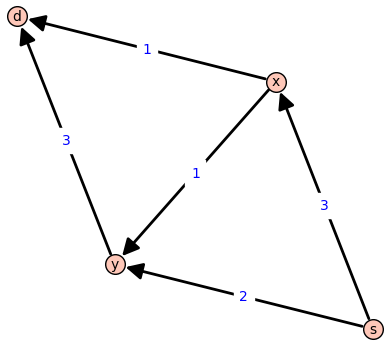

In [26]:
G = DiGraph()

#Sommet
G.add_vertex(name="s")
G.add_vertex(name="x")
G.add_vertex(name="y")
G.add_vertex(name="d")

#Edge
G.add_edge("s","x",3)
G.add_edge("x","d",1)
G.add_edge("s","y",2)
G.add_edge("y","d",3)
G.add_edge("x","y",1)

#Show
G.show(edge_labels=True)

In [42]:
#Create Linear Program
p = MixedIntegerLinearProgram(maximization=True)
V = p.new_variable(real=True, nonnegative=True)
a, b, c, d, e = V[("sx")], V[("xd")], V[("sy")], V[("yd")], V[("xy")] 

In [51]:
#Maximise
p.set_objective(a + c)

#Constraints
p.add_constraint(a + c == b + d)
p.add_constraint(a == b + e)

#Capacity
p.add_constraint(a <= 3)
p.add_constraint(b <= 1)
p.add_constraint(c <= 2)
p.add_constraint(d <= 3)
p.add_constraint(e <= 1)

#Non-negative
#p.add_constraint(a >= 0)
#p.add_constraint(b >= 0)
#p.add_constraint(c >= 0)
#p.add_constraint(d >= 0)
#p.add_constraint(e >= 0)

#Show
#p.show()
opt = p.solve()
print(opt, p.get_values(V))

4.0 {'sx': 2.0, 'xd': 1.0, 'sy': 2.0, 'yd': 3.0, 'xy': 1.0}


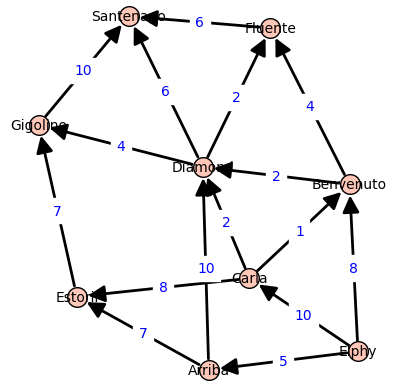

In [50]:
#Graph
G = DiGraph()

#Sommets
G.add_vertex(name="Elphy")
G.add_vertex(name="Arriba")
G.add_vertex(name="Carla")
G.add_vertex(name="Benvenuto")
G.add_vertex(name="Diamond")
G.add_vertex(name="Estoril")
G.add_vertex(name="Fluente")
G.add_vertex(name="Gigolino")
G.add_vertex(name="Santenago")

#Arcs
G.add_edge("Elphy","Arriba",5)
G.add_edge("Elphy","Carla",10)
G.add_edge("Elphy","Benvenuto",8)
G.add_edge("Carla","Estoril",8)
G.add_edge("Carla","Diamond",2)
G.add_edge("Carla","Benvenuto",1)
G.add_edge("Arriba","Estoril",7)
G.add_edge("Arriba","Diamond",10)
G.add_edge("Benvenuto","Diamond",2)
G.add_edge("Benvenuto","Fluente",4)
G.add_edge("Estoril","Gigolino",7)
G.add_edge("Diamond","Gigolino",4)
G.add_edge("Diamond","Santenago",6)
G.add_edge("Diamond","Fluente",2)
G.add_edge("Gigolino","Santenago",10)
G.add_edge("Fluente","Santenago",6)

#Show
G.show(edge_labels=True)

In [64]:
#Parameters
s = "Elphy"
t = "Santenago"

#General function
def flot(G,s,t):
    p = MixedIntegerLinearProgram(maximization=True)
    V = p.new_variable(real=True, nonnegative=True)  
    p.set_objective(sum(V[e] for e in G.outgoing_edges(s)))
    
    for i in G.edges():
        p.add_constraint(V[i] <= i[2])
    
    for u in G.vertices():
        if u!=s and u!=t:
            p.add_constraint(p.sum(V[e] for e in G.incoming_edges(u))==p.sum(V[e] for e in G.outgoing_edges(u)))
    
    opt = p.solve()
    print(opt, p.get_values(V))

flot(G,s,t)

20.0 {('Elphy', 'Arriba', 5): 5.0, ('Elphy', 'Carla', 10): 9.0, ('Elphy', 'Benvenuto', 8): 6.0, ('Arriba', 'Diamond', 10): 5.0, ('Arriba', 'Estoril', 7): 0.0, ('Benvenuto', 'Diamond', 2): 2.0, ('Benvenuto', 'Fluente', 4): 4.0, ('Carla', 'Benvenuto', 1): 0.0, ('Carla', 'Diamond', 2): 2.0, ('Carla', 'Estoril', 8): 7.0, ('Diamond', 'Fluente', 2): 0.0, ('Diamond', 'Gigolino', 4): 3.0, ('Diamond', 'Santenago', 6): 6.0, ('Estoril', 'Gigolino', 7): 7.0, ('Fluente', 'Santenago', 6): 4.0, ('Gigolino', 'Santenago', 10): 10.0}
